In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
income_df = pd.read_csv('/Users/richardwestbrook/Library/Mobile Documents/com~apple~CloudDocs/Learning/Projects/census_income.csv')
income_df = income_df[['age','workclass','education.num','marital.status','occupation','relationship',
           'race','sex','capital.gain','capital.loss','hours.per.week','native.country','income']].copy()

## Exploratory Analysis

In [37]:
income_df.head()

age workclass  education.num marital.status         occupation  \
0   90         ?              9        Widowed                  ?   
1   82   Private              9        Widowed    Exec-managerial   
2   66         ?             10        Widowed                  ?   
3   54   Private              4       Divorced  Machine-op-inspct   
4   41   Private             10      Separated     Prof-specialty   

    relationship   race     sex  capital.gain  capital.loss  hours.per.week  \
0  Not-in-family  White  Female             0          4356              40   
1  Not-in-family  White  Female             0          4356              18   
2      Unmarried  Black  Female             0          4356              40   
3      Unmarried  White  Female             0          3900              40   
4      Own-child  White  Female             0          3900              40   

  native.country income  
0  United-States  <=50K  
1  United-States  <=50K  
2  United-States  <=50K  
3  United-States  <=50K  
4  United-States  <=50K

Text(0.5, 0, 'Hours Worked per Week')

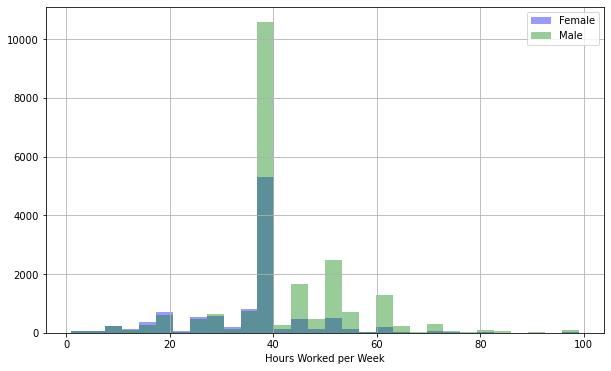

In [115]:
plt.figure(figsize=(10,6))
income_df[income_df['sex']=='Female']['hours.per.week'].hist(alpha=0.4,color='blue',
                                              bins=30,label='Female')
income_df[income_df['sex']=='Male']['hours.per.week'].hist(alpha=0.4,color='green',
                                              bins=30,label='Male')
plt.legend()
plt.xlabel('Hours Worked per Week')

<AxesSubplot:xlabel='race', ylabel='count'>

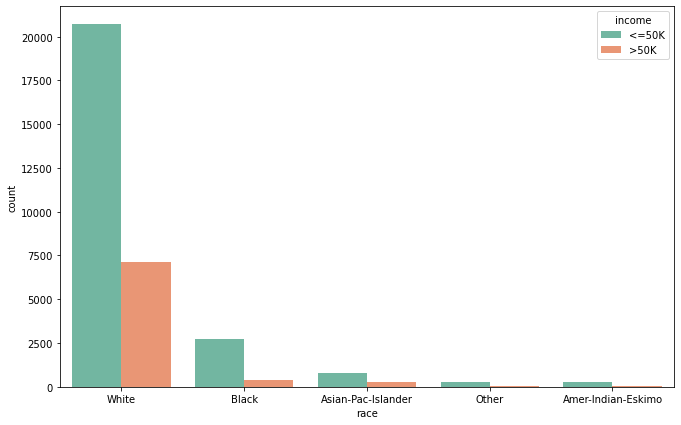

In [116]:
plt.figure(figsize=(11,7))
sns.countplot(x='race',hue='income',data=income_df,palette='Set2')

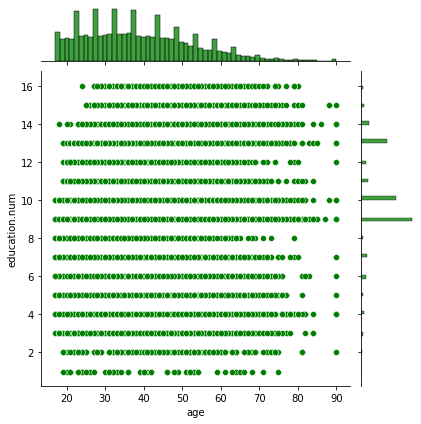

In [117]:
sns.jointplot(x='age',y='education.num',data=income_df,color='green')

<Figure size 792x504 with 0 Axes>

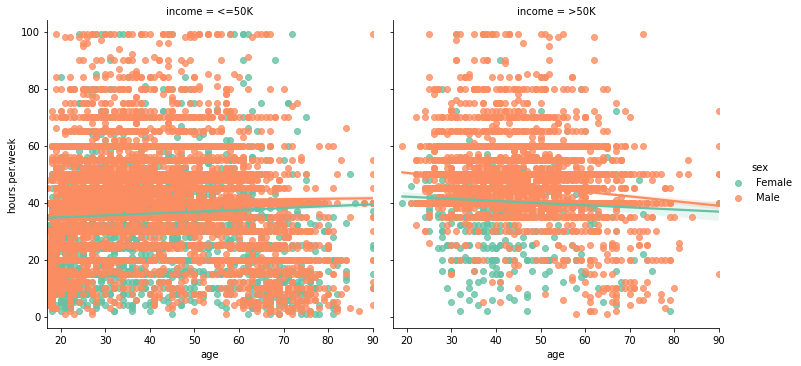

In [118]:
plt.figure(figsize=(11,7))
sns.lmplot(y='hours.per.week',x='age',data=income_df,hue='sex',
           col='income',palette='Set2')

In [3]:
income_df.dtypes

age                int64
workclass         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [4]:
cat_feats = ['workclass','marital.status','occupation','relationship','race','sex','native.country','income']

In [5]:
final_data = pd.get_dummies(income_df,columns=cat_feats,drop_first=True)

In [6]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 85 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        32561 non-null  int64
 1   education.num                              32561 non-null  int64
 2   capital.gain                               32561 non-null  int64
 3   capital.loss                               32561 non-null  int64
 4   hours.per.week                             32561 non-null  int64
 5   workclass_Federal-gov                      32561 non-null  uint8
 6   workclass_Local-gov                        32561 non-null  uint8
 7   workclass_Never-worked                     32561 non-null  uint8
 8   workclass_Private                          32561 non-null  uint8
 9   workclass_Self-emp-inc                     32561 non-null  uint8
 10  workclass_Self-emp-not-inc                 325

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = final_data.drop('income_>50K',axis=1)
y = final_data['income_>50K']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
cols = X_train.columns

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

age education.num capital.gain capital.loss hours.per.week  \
0  1.70     -2.333333          0.0          0.0            7.0   
1 -0.95     -0.666667          0.0          0.0           -3.2   
2 -0.75     -1.000000          0.0          0.0            0.0   
3 -0.45      1.000000          0.0          0.0           -4.8   
4  1.00     -0.333333          0.0          0.0            2.4   

  workclass_Federal-gov workclass_Local-gov workclass_Never-worked  \
0                   0.0                 0.0                    0.0   
1                   0.0                 0.0                    0.0   
2                   0.0                 0.0                    0.0   
3                   0.0                 0.0                    0.0   
4                   0.0                 0.0                    0.0   

  workclass_Private workclass_Self-emp-inc  ... native.country_Portugal  \
0               0.0                    0.0  ...                     0.0   
1               0.0                    0.0  ...                     0.0   
2               0.0                    0.0  ...                     0.0   
3               0.0                    0.0  ...                     0.0   
4               0.0                    0.0  ...                     0.0   

  native.country_Puerto-Rico native.country_Scotland native.country_South  \
0                        0.0                     0.0                  0.0   
1                        0.0                     0.0                  0.0   
2                        0.0                     0.0                  0.0   
3                        0.0                     0.0                  0.0   
4                        0.0                     0.0                  0.0   

  native.country_Taiwan native.country_Thailand  \
0                   0.0                     0.0   
1                   0.0                     0.0   
2                   0.0                     0.0   
3                   0.0                     0.0   
4                   0.0                     0.0   

  native.country_Trinadad&Tobago native.country_United-States  \
0                            0.0                          0.0   
1                            0.0                          0.0   
2                            0.0                          0.0   
3                            0.0                         -1.0   
4                            0.0                          0.0   

  native.country_Vietnam native.country_Yugoslavia  
0                    0.0                       0.0  
1                    0.0                       0.0  
2                    0.0                       0.0  
3                    0.0                       0.0  
4                    0.0                       0.0  

[5 rows x 84 columns]

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtree = DecisionTreeClassifier()

In [19]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
predictions = dtree.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7458
           1       0.62      0.61      0.62      2311

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



In [23]:
print(confusion_matrix(y_test,predictions))

[[6594  864]
 [ 892 1419]]


## Graph (If Simple)

In [100]:
from IPython.display import Image  
import io
from six import StringIO  
import pydotplus

features = list(final_data.columns[:-1])

dot_data = StringIO()  
tree.export_graphviz(dtree, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.28096 to fit



## Random Forrest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(n_estimators=600)

In [28]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [29]:
predictions = rfc.predict(X_test)

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7458
           1       0.71      0.62      0.66      2311

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769



In [63]:
print(confusion_matrix(y_test,predictions))

[[6811  567]
 [ 914 1477]]
